# **Questão 2** - Avner José Guimaraẽs Ribeiro

## **Instruções**



*   Verifique as respostas antes de enviar, veja se elas fazem sentido!
*   Lembre-se de salvar frequentemente!
*   Não envie apenas o notebook, envie a pasta inteira com as imagens!



# **Formulário**

## **Importações**
```
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
```

## **Códigos**
```
# Manipulação de imagens
img = Image.open('nome.extensão')
img = np.array(Image.open('nome.extensão'))
img = img[:, :, :3]
img_pil = Image.fromarray(img_np)
img.save('nome.png')
Image.fromarray(img).save('nome_arquivo.extensao')

# Histograma
plt.bar(range(256), histogram_r, color='red')
plt.bar(range(256), histogram_g, color='green')
plt.bar(range(256), histogram_b, color='blue')

# Detecção de bordas
abs_tg_eixo = np.abs(np.diff(img, axis=eixo, append=0))
```

## **Fórmulas**

### **Grayscale**

Lightness: $\frac{max(R,G,B)+min(R,G,B)}{2}$

Average: $\frac{R+G+B}{3}$

Luminosity: $0.2126 \cdot R + 0.7152 \cdot G + 0.0722 \cdot B$


### **Cor**

$$\begin{bmatrix}
    R \\ G \\ B
\end{bmatrix} = \begin{bmatrix}
    255 \\ 255 \\ 255
\end{bmatrix} - \begin{bmatrix}
    C \\ M \\ Y
\end{bmatrix}$$



**a)** Abra os arquivos **dog.jpg** e **oculos.jpg** presentes na pasta e mostre na tela. Verifique a presença do canal alfa e faça o devido tratamento caso ele exista.

(200, 200, 3)
(400, 400, 3)


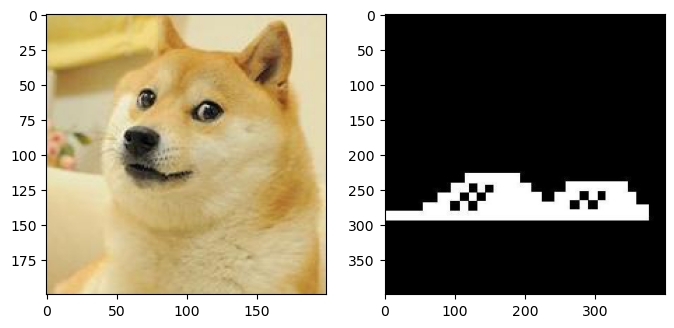

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# Carregando imagens:
dog = np.array(Image.open('dog.jpg'))
oculos = np.array(Image.open('oculos.jpg'))

# Mostrando as dimensões das imagems
# Obs: Como as duas imagens tem o formato (x,y,3) significa que não possuem canal alfa, não é necessário ter o [:,:,:3]
print(dog.shape)  
print(oculos.shape)

plt.figure(figsize=(8,8))

plt.subplot(2,2,1)
plt.imshow(dog)
plt.subplot(2,2,2)
plt.imshow(oculos)

**b)** Realize a mudança de escala na imagem **dog.jpg** a fim de deixá-la com as mesmas dimensões da imagem **oculos.jpg**. Exiba o resultado.

**Obs: utilize o Nearest Neighbor ou Interpolação Bilinear para resolver o problema de ausência de pixels.**

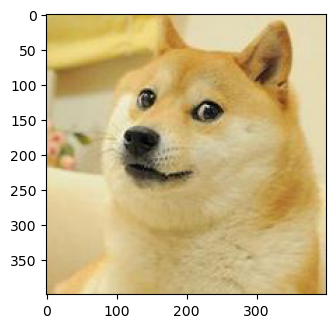

In [12]:
def amplifity(img,sx,sy):
    #Obtendo as dimensoes da imagem:
    (l,c,p)=img.shape
    
    #Calculando as novas dimensões:
    (ls,cs)=(l*sx,c*sy)
    
    sc_img = np.zeros(shape=(ls, cs, p), dtype=np.uint8)

    #Aplica o nearest neighbor
    for i in range(ls):
        for j in range(cs):
            new_x = int(np.floor(i * (l / ls)))
            new_y = int(np.floor(j * (c / cs)))
        
            sc_img[i, j] = img[new_x, new_y]
        
    return sc_img

big_dog = amplifity(dog,2,2)
               
# Mostrando a imagem "dog.jpg" escalonada na tela:
plt.figure(figsize=(8,8))
plt.subplot(2,2,1)
plt.imshow(big_dog) 

**c)** Faça espelhamento da imagem **oculos.jpg** nos eixos **x e y**. Exiba o resultado.

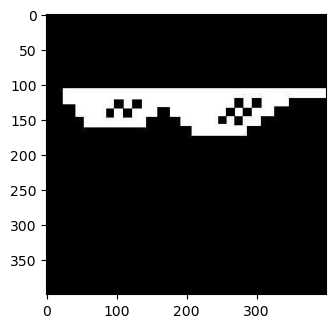

In [25]:
def reflexao (img):
    
    img_refl = np.zeros(shape=img.shape, dtype=np.uint8)
    
    (l,c,p)=img.shape
    
    for i in range(l):
        for j in range(c):
            new_x = -i
            new_y = -j
            img_refl[new_x, new_y] = img[i, j]
    
    return img_refl

oculos_refl = reflexao(oculos)

# Mostrando a imagem "oculos.jpg" espelhada na tela:
plt.figure(figsize=(8,8))
plt.subplot(2,2,1)
plt.imshow(oculos_refl) 

**d)** Realize a operação lógica NOT na imagem daquestão anterior. Exiba o resultado.

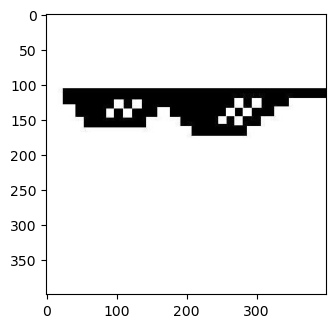

In [27]:
not_oculos =~ oculos_refl

# Mostrando a imagem resultante da operação NOT da "oculos.jpg" espelhada na tela:
plt.figure(figsize=(8,8))
plt.subplot(2,2,1)
plt.imshow(not_oculos) 

**e)** Realize a operação lógica E entre as imagens das questões **B** e **D**. Exiba o resultado.

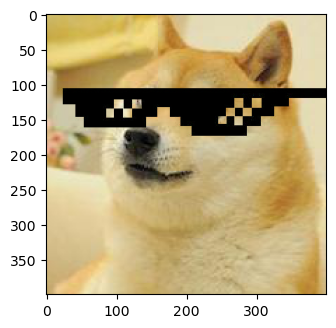

In [28]:
dog_glasses = big_dog & not_oculos

# Mostrando a imagem do dog com oculos na tela:
plt.figure(figsize=(8,8))
plt.subplot(2,2,1)
plt.imshow(dog_glasses)

**f)** Realize o cisalhamento na imagem da questão anterior. Utilize cx = 0,3 e cy = 0,2.

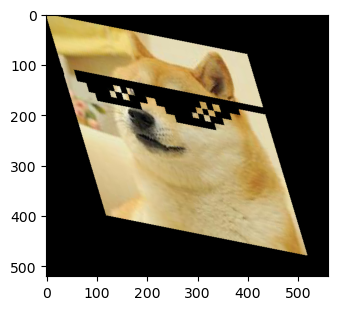

In [29]:
def cisalha(img, cx, cy):
    # Obtendo as dimensões da imagem:
    (l, c, p) = img.shape
    
    # Calculando as novas dimensões após cisalhamento, adicionando uma margem de 10% nas direções horizontal e vertical:
    img_cs = np.zeros(shape=(int(l * (1.1 + cy)), int(c * (1.1 + cx)), p), dtype=np.uint8)
    
    for i in range(l):
        for j in range(c):
            new_x = int(j + cx * i)  # Nova coordenada x após o cx
            new_y = int(cy * j + i)  # Nova coordenada y após o cy
            img_cs[new_y, new_x] = img[i, j] 
            
    return img_cs


# Chamando a função cisalhamento com cx=0.3 e cy=0.2:
res_cs = cisalha(dog_glasses, 0.3, 0.2)

# Mostrando a imagem do dog com oculos cisalhada na tela:
plt.figure(figsize=(8,8))
plt.subplot(2,2,1)
plt.imshow(res_cs)

**g)** Converta a imagem da questão anterior para preto e branco. Exiba o resultado.

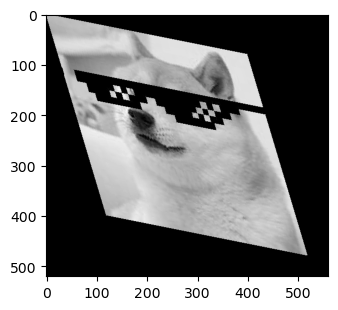

In [30]:
def greyscale(img):
    grey_img = (img[:,:,0] * 0.2126 + img[:,:,1] * 0.7152 + img[:,:,2] * 0.0722).astype(np.uint8)
    
    return grey_img

dog_grey = greyscale(res_cs)

# Mostrando a imagem do dog com oculos cisalhada em escala de tons de cinza na tela:
plt.figure(figsize=(8,8))
plt.subplot(2,2,1)
plt.imshow(dog_grey, cmap="gray")
    

**h)** Realize a detecção de bordas da imagem anterior. Utilize o método da convolução e o kernel de Sobel. Exiba o resultado.

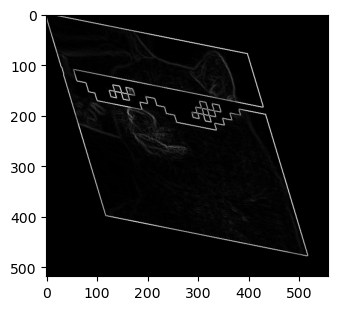

In [38]:
# Argumentos:
# * image: imagem grayscale de entrada (corresponde ao f da fórmula)
# * kernel: filtro de convolução

# Retorno:
# * a convolução entre image e kernel

def conv(image, kernel):
    m, n = kernel.shape
    # assert verifica se uma condição é verdadeira e mostra uma mensagem de erro caso falhe:
    assert m == n, "Kernel deve ser uma matriz quadrada."
    l, c = image.shape
    
    # novas dimensões da imagem (imagem menos o tamanho do filtro):
    new_l = l - m + 1
    new_c = c - n + 1
    new_image = np.zeros(shape=(new_l, new_c))
    for i in range(new_l):
        for j in range(new_c):
            # soma da multiplicação ponto-a-ponto entre o kernel e a imagem (recorte do trecho da imagem do mesmo tamanho do kernel):
            new_image[i, j] = np.sum(image[i:i + n, j:j + m] * kernel)
    
    return new_image

def sobel(img):
    kernel_x = np.array([[1, 0,-1], [ 2, 0, -2],[1,0,-1]], dtype=np.float64)
    kernel_y = np.array([[1, 2, 1], [0, 0, 0],[-1,-2,-1]], dtype=np.float64)
    
    conv_x = conv(img, kernel_x)
    conv_y = conv(img, kernel_y)
    
    gradient = np.hypot(conv_x, conv_y)
    
    return gradient
    

dog_borda = sobel(dog_grey/255.0)

# Mostrando a imagem da questão anterior com detecção de bordas na tela:
plt.figure(figsize=(8,8))
plt.subplot(2,2,1)
plt.imshow(dog_borda, cmap="gray")

